In [844]:
%matplotlib nbagg
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Reading files

In [817]:
df = []
#header = ['x1','x2','y']
for i in range(1,5):
    df.append(pd.read_csv('datafile'+str(i)+'.csv',header=None))

### Data Exploration

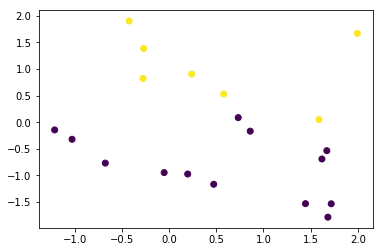

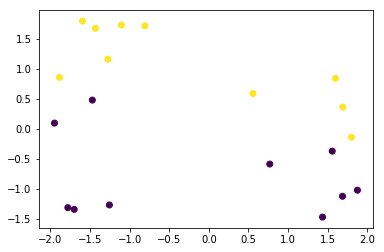

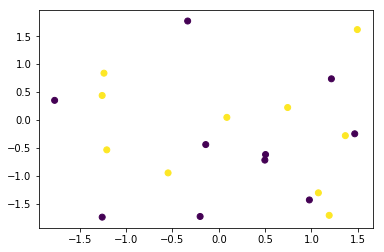

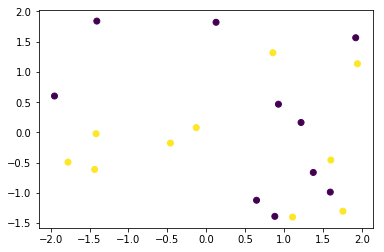

In [818]:
for i in range(len(df)):
    label = df[i][2]
    plt.scatter(df[i][0],df[i][1], c=label)
    plt.show()

### Weight fitting

In [826]:
def find_weight(j,w,bias,alpha):
    cnt = 0
    w_graph = []
    w_bias = []
    while(True):
        e = 1000
        if((e**2>0.0) & (cnt<10)):
            for i in range(len(df[j])):
                    x = df[j].ix[i,0:1]
                    x = np.array(x)
                    y = np.matmul(x,w)+bias
                    e = df[j][2][i] - y
                    dw = (x.T)*alpha*(e)
                    dw = dw.reshape(2,1)
                    bias = bias + e
                    w = w + dw
                    w_graph.append(w)
                    w_bias.append(bias)
                    
            cnt = cnt+1
        else:
            break
    return w,w_graph,w_bias


### Forward propogate

In [862]:
def predict_output(j,w):
    c=0
    for i in range(len(df[j])):
        x = df[j].ix[i,0:1]
        x =np.array(x)
        y = np.matmul(x,w) + bias
        
        if(y>0.5):
            r = 1
        else:
            r = 0
        if((df[j].ix[i,2] - r)  == 0):
            c=c+1
    
    print("Accuracy for file "+str(j))       
    print((c/20)*100)  
        

### Function Calls and Accuracy checks

In [863]:
w1 = np.random.rand(2,1)
alpha = 0.01
b1 = np.random.rand(1)

In [864]:
weights = []
graph_w = []
graph_b = []
for j in range(4):  
    weights.append(find_weight(j,w1,b1,alpha)[0])
    graph_w.append(find_weight(j,w1,b1,alpha)[1])
    graph_b.append(find_weight(j,w1,b1,alpha)[2])

In [829]:
for j in range(4):
    predict_output(j,weights[j])

Accuracy for file 0
80.0
Accuracy for file 1
85.0
Accuracy for file 2
55.00000000000001
Accuracy for file 3
55.00000000000001


## Animation for each epoch 

In [858]:
def anime(k):  
    x_plot = np.array([df[k].ix[:,0].min(), df[k].ix[:,2].max()])
    y_plot = (-graph_b[k][-1][0] - np.dot(graph_w[k][-1][0][0], x_plot)) / graph_w[k][-1][1][0]


    def animate(i, x_plot, y_plot, line):
        y_plot = (-graph_b[k][i][0] - np.dot(graph_w[k][i][0][0], x_plot)) / graph_w[k][i][1][0]
        line.set_data(x_plot, y_plot)
        line.axes.axis([-2, 2, -2, 2])
        return line,
    fig, ax = plt.subplots()
    dat1 = df[k][df[k].ix[:,2]==0]
    dat2 = df[k][df[k].ix[:,2]==1]
    plt.scatter(dat1.ix[:,0], dat1.ix[:,1], c=['red'], )
    plt.scatter(dat2.ix[:,0], dat2.ix[:,1], c=['black'])
    line, = ax.plot(x_plot, y_plot)
    anim = animation.FuncAnimation(fig, animate, frames=len(graph_w[k]), fargs=[x_plot, y_plot, line], blit=True, interval = 1000)
    print (x_plot, y_plot)
    anim.save('data'+str(k)+'.gif')
    plt.show()

#### File 1

<IPython.core.display.Javascript object>


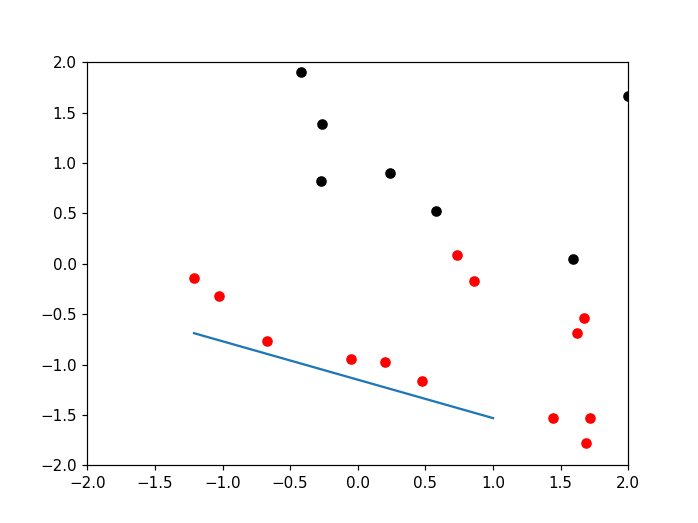

[-1.21073265  1.        ] [-0.77700211 -1.58794406]


/home/user/stackRoute/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [865]:
anime(0)

#### File 2

<IPython.core.display.Javascript object>


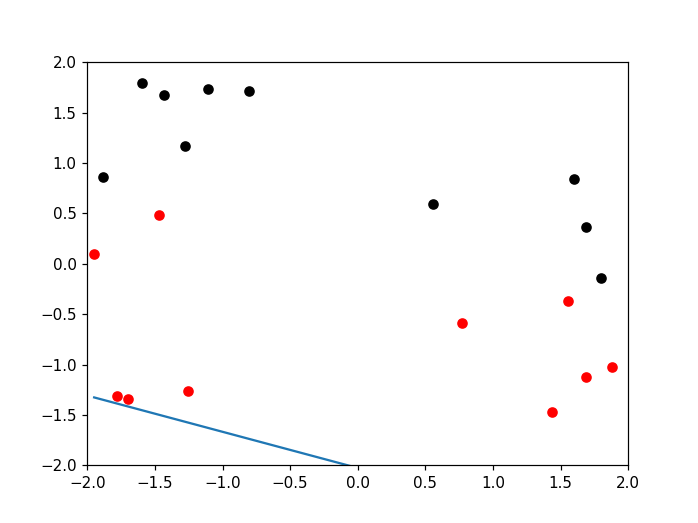

[-1.94913327  1.        ] [ 0.57995559  0.25527866]


/home/user/stackRoute/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [867]:
anime(1)

#### File 3

<IPython.core.display.Javascript object>


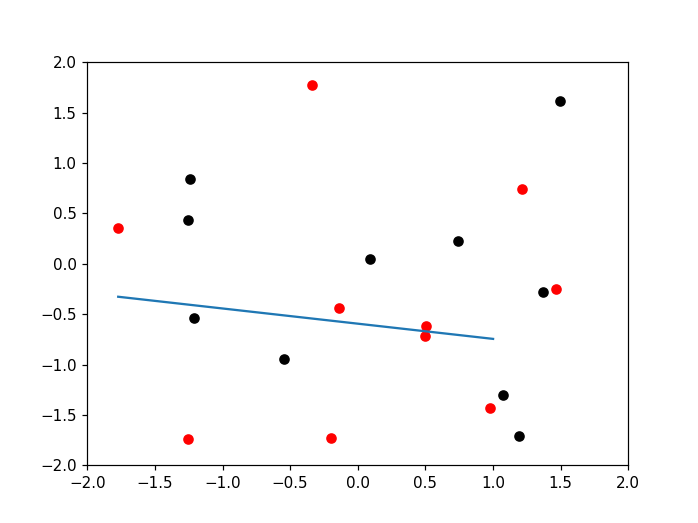

[-1.77141496  1.        ] [ 0.37323924 -0.04110485]


/home/user/stackRoute/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [869]:
anime(2)

#### File 4

<IPython.core.display.Javascript object>


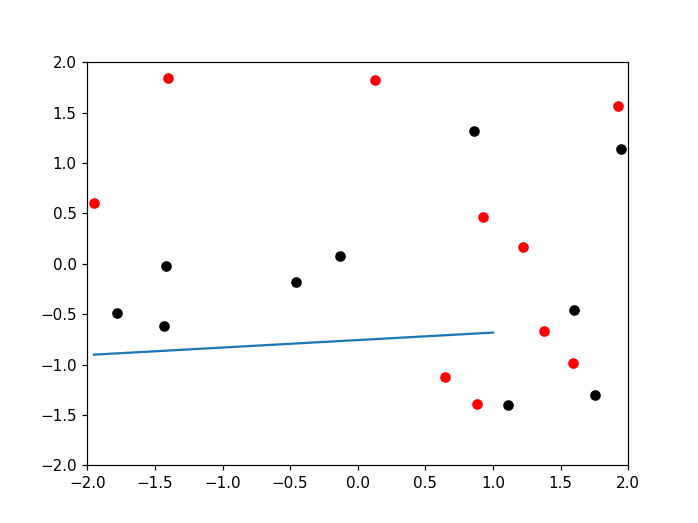

[-1.95041575  1.        ] [-0.90134368 -0.68229892]


/home/user/stackRoute/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [871]:
anime(3)